In [1]:
%pylab inline

from styles import slides

Populating the interactive namespace from numpy and matplotlib


In [2]:
odir = "../inputs/real_deal/"
catalog = genfromtxt("../inputs/real_deal/ugriz_catalog_rf.txt", dtype=None, names=True)
catalog_of = genfromtxt("../inputs/real_deal/ugriz_catalog_of.txt", dtype=None, names=True)

written_output = True

weff = array([3.5618E+03, 4.7189E+03, 6.1852E+03, 7.4997E+03, 8.9615E+03])

def mag2flux(mag, wlength):
    return 10**(-0.4 * (mag - 22.5)) * 3.631e-6 * 1e-23 * (299792458.0E10/wlength**2)

/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
/home/mejia/Projects/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


(0.2, 1)

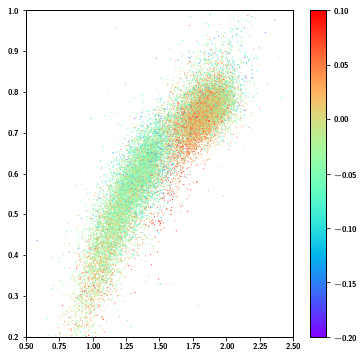

In [3]:
u_r_rf = catalog["u_mag"]-catalog["r_mag"]

u_g_rf = catalog["u_mag"]-catalog["g_mag"]
u_g_of = catalog_of["u_mag"]-catalog_of["g_mag"]

g_r_rf = catalog["g_mag"]-catalog["r_mag"]
g_r_of = catalog_of["g_mag"]-catalog_of["r_mag"]

mask = (catalog["redshift"]>0.05)&(~isinf(u_g_of))&(~isinf(g_r_of))&(~isnan(u_g_of))&(~isnan(g_r_of))

scatter(u_g_rf[mask], g_r_rf[mask], c=u_g_of[mask]-u_g_rf[mask], s=1, lw=0, vmin=-0.2, vmax=0.1, cmap=cm.rainbow)
#hist2d(u_r_rf[mask], u_g_of[mask]-u_g_rf[mask], 50, cmap=cm.rainbow)
colorbar()

xlim(0.5, 2.5)
ylim(0.2, 1)

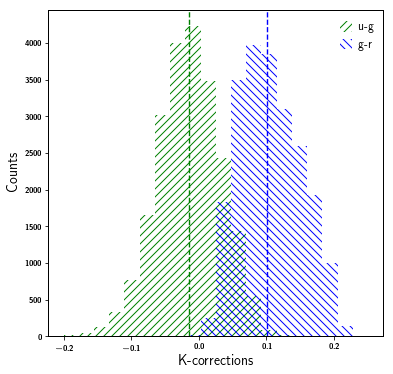

In [4]:
hist(u_g_of[mask]-u_g_rf[mask], 20, range=(-0.2,+0.25), histtype="stepfilled", ec="g", fc="none", hatch="///", label="u-g")
hist(g_r_of[mask]-g_r_rf[mask], 20, range=(-0.2,+0.25), histtype="stepfilled", ec="b", fc="none", hatch="\\\\\\", label="g-r")
legend(fontsize=12)

axvline(median(u_g_of[mask]-u_g_rf[mask]), ls="--", lw=1.4, color="g")
axvline(median(g_r_of[mask]-g_r_rf[mask]), ls="--", lw=1.4, color="b")

xlabel("K-corrections")
ylabel("Counts")

savefig("img/kcorr_dist.png", bbox_inches="tight")

In [5]:
if not written_output:
    mag = zeros(5)
    sig = zeros(5)
    for i, fn in enumerate(catalog["input_file"]):
        fname = "processed_SDSS_"+fn.replace("fit", "txt")

        f = open(odir+fname, "w")
        f.write("# redshift = {0:8.4f}\n".format(0.0))
        f.write("#\n")
        f.write("{0:15s}{1:15s}{2:15s}\n".format("#        lambda", "           flux", "          sigma"))

        mag[0] = catalog["u_mag"][i]
        mag[1] = catalog["g_mag"][i]
        mag[2] = catalog["r_mag"][i]
        mag[3] = catalog["i_mag"][i]
        mag[4] = catalog["z_mag"][i]
        sig[0] = catalog["u_err"][i]
        sig[1] = catalog["g_err"][i]
        sig[2] = catalog["r_err"][i]
        sig[3] = catalog["i_err"][i]
        sig[4] = catalog["z_err"][i]

        flux   = mag2flux(mag, weff)
        sigma  = 2.5 * log10(exp(1.0)) * (sig/flux)
        for j in xrange(5):
            f.write("{0:15.4f}{1:15.4e}{2:15.4e}\n".format(weff[j], flux[j], sigma[j]))
        f.close()
        
        written_output = True